In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

## Loading the data

In [4]:
df=pd.read_csv('translated.csv',encoding='utf-8')
df.sample(10)

,Sentence,Sentiment,Translated
101,সুকন্ঠৰে সভ্য গীত গাব লাগে,0,Sing civilised songs with a voice
458,আও ধুনীয়া ভিডিও,1,Aao Beautiful Videos
837,যদি জান গাব নাজানো তেতিয়া হলে অযথা গান বোৰ গা...,0,"If you don't know how to sing, don't sing unne..."
206,মই এই গানটো প্ৰতিদিনে বজাওঁ,1,I play this song every day
231,নিজৰ প্ৰতিভাৰ ওপৰত বিশ্বাস ৰাখি আগুৱাই যোৱা ।,1,To keep faith in your talent and move forward.
205,গৰিলা,0,guerrilla
463,চুলি কাটি লো আগত,0,Cut your hair in advance
694,কোনে কোনে দিশ্লিকে কৰিব আহিছে,0,Who is coming to do it in a way?
220,ইমান ধুনীয়া বিহু গানবোৰ শুনিয়েই সৰুৰ পৰা ডাঙ...,1,He grew up from a young age after listening to...
13,কি যে সুন্দৰ গীতটো,1,What a beautiful song


In [5]:
df.shape

(1028, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentence    1028 non-null   object
 1   Sentiment   1028 non-null   int64 
 2   Translated  1028 non-null   object
dtypes: int64(1), object(2)
memory usage: 24.2+ KB


In [7]:
#checking missing values
df.isnull().sum()

Sentence      0
Sentiment     0
Translated    0
dtype: int64

## Removing duplicate values

In [8]:
#check for duplicate values
df.duplicated().sum()

14

In [9]:
#removing duplicates
df.drop_duplicates(subset ="Translated",
                     keep ='first', inplace = True)
df.shape

(1005, 3)

# EDA
## Distribution of positive and negative sentences

In [10]:
df['Sentiment'].value_counts()

0    513
1    492
Name: Sentiment, dtype: int64

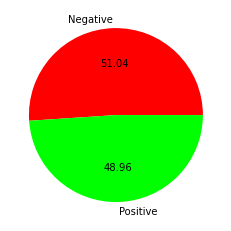

In [11]:
plt.pie(df['Sentiment'].value_counts(),labels=['Negative','Positive'],colors=['red','lime'],autopct="%0.2f")
plt.show()

## Number of characters in each sentence

In [12]:
df['num_char']=df['Translated'].apply(len)

In [13]:
df.head()

,Sentence,Sentiment,Translated,num_char
0,এই গানটো কোনে লিখিছিল নো?,1,Who wrote this song no?,23
1,মাকচুদু,0,makchudu,8
2,বৰ্তমান সময়ত এনেকুৱা মধুৰ গীত শুনিবলৈ পোৱা বহু...,1,It is very difficult to hear such sweet songs ...,52
3,কি গান গাবলৈ আহি ছ,0,What songs to sing,18
4,গানটো গাবলৈ লাজ নাই,0,No shame in singing the song,28


## Number of words in each sentence

In [14]:
df['num_words']=df['Translated'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Sentence,Sentiment,Translated,num_char,num_words
0,এই গানটো কোনে লিখিছিল নো?,1,Who wrote this song no?,23,6
1,মাকচুদু,0,makchudu,8,1
2,বৰ্তমান সময়ত এনেকুৱা মধুৰ গীত শুনিবলৈ পোৱা বহু...,1,It is very difficult to hear such sweet songs ...,52,11
3,কি গান গাবলৈ আহি ছ,0,What songs to sing,18,4
4,গানটো গাবলৈ লাজ নাই,0,No shame in singing the song,28,6


In [15]:
df[['num_char','num_words']].describe()

,num_char,num_words
count,1005.000000,1005.000000
mean,36.753234,7.806965
std,25.297489,5.415831
min,3.000000,1.000000
25%,20.000000,4.000000
50%,31.000000,7.000000
75%,48.000000,10.000000
max,201.000000,43.000000


In [16]:
#positive sentiment
df[df['Sentiment']==1][['num_char','num_words']].describe()

,num_char,num_words
count,492.000000,492.000000
mean,41.634146,8.796748
std,28.002478,5.926514
min,3.000000,1.000000
25%,22.000000,4.000000
50%,35.000000,8.000000
75%,54.000000,12.000000
max,201.000000,43.000000


In [17]:
#negative sentiment
df[df['Sentiment']==0][['num_char','num_words']].describe()

,num_char,num_words
count,513.000000,513.000000
mean,32.072125,6.857700
std,21.403322,4.689294
min,3.000000,1.000000
25%,16.000000,3.000000
50%,28.000000,6.000000
75%,43.000000,9.000000
max,149.000000,33.000000


## Data cleaning

In [18]:
ps = PorterStemmer()

In [19]:
def transform_t(text):
    #making the text lowercase
    text = text.lower()
    #tokenizing
    text = nltk.word_tokenize(text)
    
    y = []
    #keeping the alphanumeric characters only
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    #Removing stopwords and punctuations
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    #stemming
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [20]:
transform_t("It is very difficult to hear such sweet songs ...")

'difficult hear sweet song'

In [21]:
df['Transformed']=df['Translated'].apply(transform_t)
df.sample(10)

,Sentence,Sentiment,Translated,num_char,num_words,Transformed
142,.মই অসমবুজি নাপাওঁ কিন্তু মই এই সুৰ আৰু সংগীত ...,1,I don't understand inequality but I love this ...,60,12,understand inequ love tune music
917,কেনেকৈ ইমান অৰ্থপূৰ্ণ শব্দ বোৰ বিচাৰি পায়,1,How to find such meaningful words,33,6,find meaning word
394,আপোনাৰ কণ্ঠস্বৰ অসহনীয়,0,Your voice is unbearable,24,4,voic unbear
314,এইবোৰ হে বিহু শুনিলে শুনি থাকিবৰ মন যায়,1,It's all you feel like listening to when you h...,55,13,feel like listen hear bihu
993,অশ্লীল গীতত,0,in obscene song,15,3,obscen song
952,বহুত ভাল লাগিছে গানটো,1,It's great to have the song,27,7,great song
452,বেয়া লাগিল,0,it felt bad,11,3,felt bad
846,ষাৰ গৰু,0,sher cow,8,2,sher cow
543,গোটেই খন একেবাৰে ছেটেৰিং কৰি পেলাইছে,0,The whole thing is absolutely set.,34,7,whole thing absolut set
776,আপুনি এজন মানসিক ৰোগী,0,You are a mental lying patient,30,6,mental lie patient


## Most frequent words in positive and negative sentences

In [22]:
positive_corpus=[]
for snt in df[df['Sentiment']==1]['Transformed'].tolist():
    for word in snt.split():
        positive_corpus.append(word)

In [23]:
from collections import Counter

In [24]:
Counter(positive_corpus).most_common(30)

[('song', 264),
 ('listen', 59),
 ('beauti', 53),
 ('bihu', 53),
 ('assames', 42),
 ('hear', 29),
 ('love', 29),
 ('mind', 25),
 ('feel', 23),
 ('nice', 23),
 ('word', 23),
 ('music', 21),
 ('like', 19),
 ('time', 17),
 ('assam', 17),
 ('great', 16),
 ('heart', 16),
 ('one', 16),
 ('old', 15),
 ('fun', 15),
 ('day', 15),
 ('voic', 15),
 ('good', 15),
 ('sweet', 13),
 ('today', 13),
 ('da', 13),
 ('much', 13),
 ('make', 13),
 ('languag', 13),
 ('mani', 13)]

In [25]:
negative_corpus=[]
for snt in df[df['Sentiment']==0]['Transformed'].tolist():
    for word in snt.split():
        negative_corpus.append(word)
Counter(negative_corpus).most_common(30)

[('song', 142),
 ('sing', 43),
 ('like', 28),
 ('assames', 27),
 ('listen', 23),
 ('bihu', 19),
 ('die', 18),
 ('dog', 18),
 ('video', 17),
 ('bad', 17),
 ('come', 14),
 ('watch', 13),
 ('peopl', 12),
 ('kela', 12),
 ('voic', 12),
 ('assam', 12),
 ('head', 11),
 ('side', 10),
 ('hear', 10),
 ('crazi', 10),
 ('feel', 10),
 ('make', 10),
 ('singer', 10),
 ('pleas', 9),
 ('want', 9),
 ('good', 9),
 ('work', 9),
 ('day', 9),
 ('worst', 9),
 ('even', 8)]

## Feature extraction using Count Vectorizer

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
cv=CountVectorizer(max_features=1000)

In [28]:
X = cv.fit_transform(df['Transformed']).toarray()

In [29]:
X.shape

(1005, 1000)

In [30]:
df1 = pd.DataFrame(X, columns=cv.get_feature_names())
df1.head(10)

,10,17,2020,50,aaji,aao,aap,abai,abl,absolut,...,ya,ye,year,yesterday,yet,yoke,young,youth,zindabad,zubin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
Y=df['Sentiment'].values

In [32]:
Y.shape

(1005,)

## Train test split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [35]:
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(804, 1000) (201, 1000)
(804,) (201,)


In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score

## Training our model with different classifying algorithms

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [38]:
svc=SVC(kernel= 'linear', gamma= 0.8, C= 0.9)
knc=KNeighborsClassifier(n_neighbors=6, weights= "distance",metric= "minkowski")
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(criterion="gini",splitter= "best",max_depth=150,min_samples_split=6)
lrc=LogisticRegression(tol= 0.001,C= 2,solver= "saga")
rfc=RandomForestClassifier(n_estimators=100,criterion="gini",min_samples_split= 3)
etc=ExtraTreesClassifier(n_estimators= 1000, max_features='log2', criterion='entropy')

In [39]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'ETC':etc
}

In [40]:

def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    Y_pred=clf.predict(X_test)
    accuracy=accuracy_score(Y_test,Y_pred)
    precision=precision_score(Y_test,Y_pred)
    f1score=f1_score(Y_test,Y_pred)
    recall=recall_score(Y_test,Y_pred)
    return accuracy,precision,f1score,recall

In [41]:
for name,clf in clfs.items():
    current_accuracy,current_precision,current_f1score,current_recall=train_classifier(clf,X_train,Y_train,X_test,Y_test)
    print("For",name)
    print("Accuracy- ", current_accuracy)
    print("Precision- ",current_precision)
    print("F1 Score- ",current_f1score)
    print("Recall- ",current_recall)
    print("\n")

For SVC
Accuracy-  0.835820895522388
Precision-  0.8202247191011236
F1 Score-  0.8156424581005587
Recall-  0.8111111111111111


For KN
Accuracy-  0.7512437810945274
Precision-  0.7272727272727273
F1 Score-  0.7191011235955056
Recall-  0.7111111111111111


For NB
Accuracy-  0.8606965174129353
Precision-  0.81
F1 Score-  0.8526315789473685
Recall-  0.9


For DT
Accuracy-  0.8109452736318408
Precision-  0.7888888888888889
F1 Score-  0.7888888888888889
Recall-  0.7888888888888889


For LR
Accuracy-  0.8756218905472637
Precision-  0.8571428571428571
F1 Score-  0.861878453038674
Recall-  0.8666666666666667


For RF
Accuracy-  0.8159203980099502
Precision-  0.7849462365591398
F1 Score-  0.7978142076502732
Recall-  0.8111111111111111


For ETC
Accuracy-  0.8258706467661692
Precision-  0.7894736842105263
F1 Score-  0.8108108108108109
Recall-  0.8333333333333334




In [42]:
#best accuracy by Logistic Regression (88% approx)
lrc.fit(X_train,Y_train)
Y_pred=lrc.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

0.8756218905472637
[[98 13]
 [12 78]]


## Confusion matrix

<AxesSubplot:>

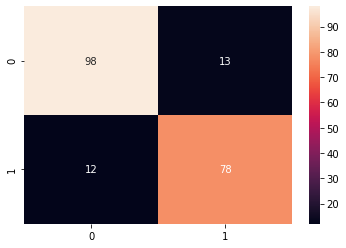

In [43]:
sns.heatmap(confusion_matrix(Y_test,Y_pred), annot=True)

## Exporting the model and vectorizer

In [221]:
import pickle

In [222]:
pickle.dump(cv,open('vectorizer_mt.pkl','wb'))
pickle.dump(lrc,open('model_mt.pkl','wb'))